In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: >

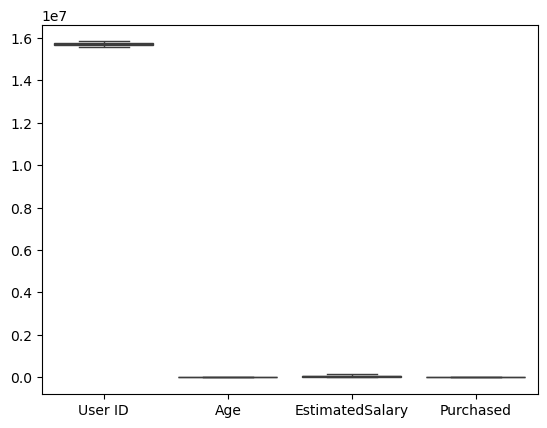

In [6]:
sns.boxplot(df)

In [7]:
le=LabelEncoder()

<Axes: xlabel='count', ylabel='Gender'>

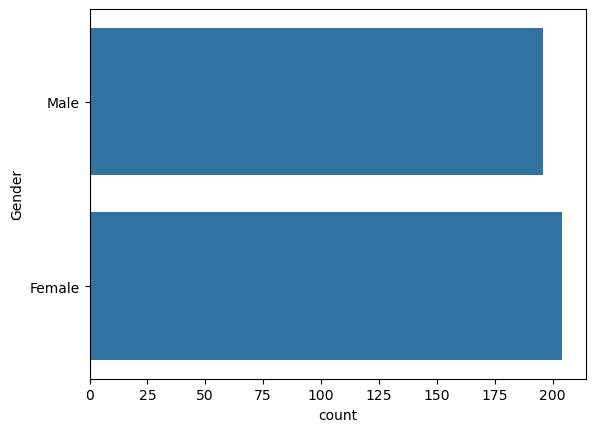

In [8]:
sns.countplot(df['Gender'])

In [9]:
df['Gender']=df['Gender'].map({ 'Male':1,'Female':0})
    

In [10]:
df['Gender']=df['Gender'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

<Axes: >

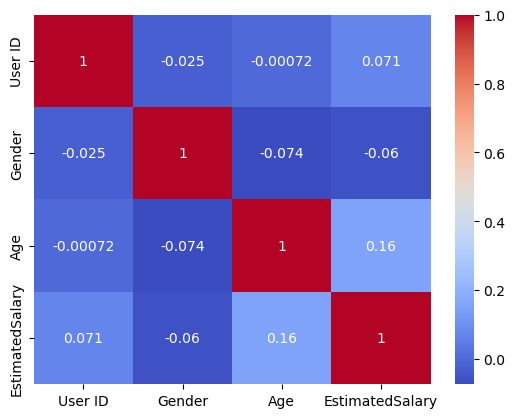

In [15]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

In [16]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=30,test_size=0.2)

In [18]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.925

<Axes: >

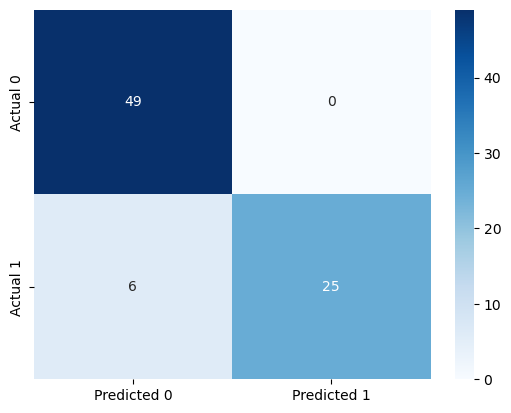

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',xticklabels=['Predicted 0','Predicted 1'] ,yticklabels=['Actual 0','Actual 1'])

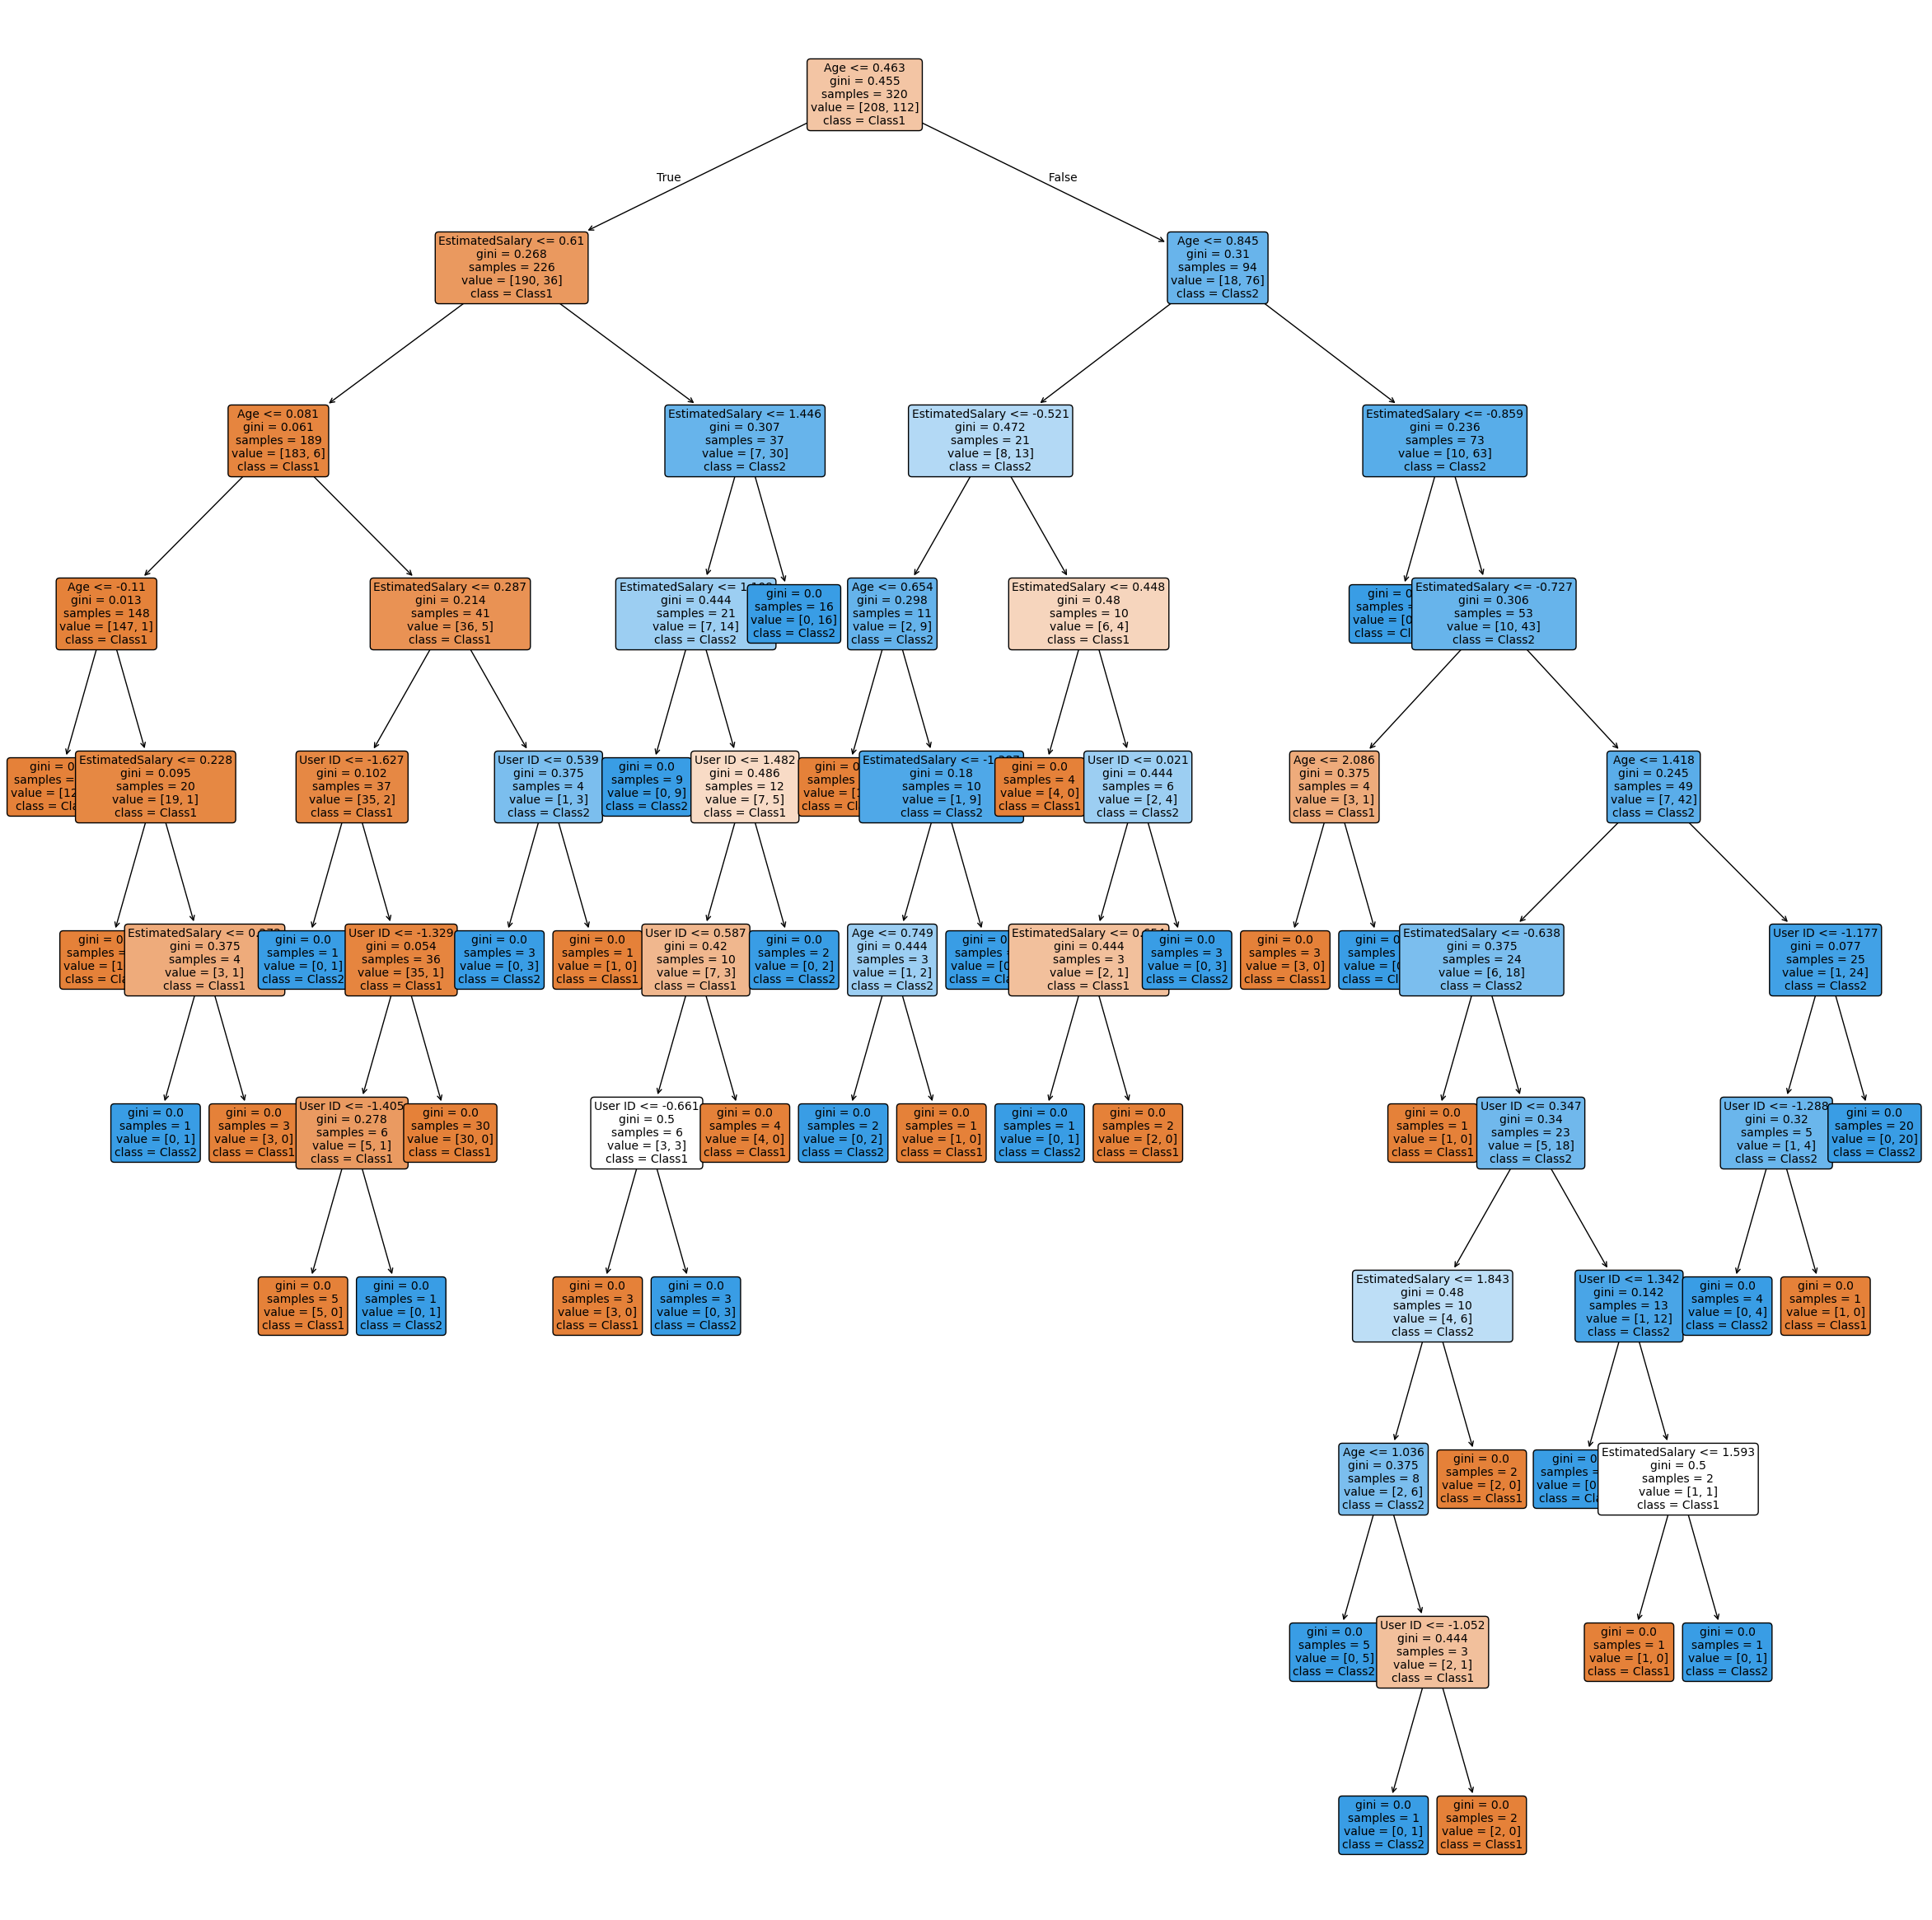

In [21]:
from sklearn.tree import plot_tree

# Assuming clf is your trained DecisionTreeClassifier
plt.figure(figsize=(30, 30))  # Adjust figure size for better readability
plot_tree(model, 
          filled=True,      # Color-filled nodes
          feature_names=X.columns,  # Replace with actual feature names
          class_names=['Class1', 'Class2'],  # Replace with actual class names
          rounded=True,     # Rounded corners for better visualization
          fontsize=10)      # Adjust font size
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

In [64]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.95